In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df.shape

(4177, 9)

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [12]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,8.933445
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.222790
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,7.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,8.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,10.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


In [13]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [14]:
df.Rings.unique()

array([14,  6,  8,  9,  7, 19, 15, 18, 13, 10, 11, 17, 12,  4,  3,  5, 20,
       16, 21,  0,  2, 25, 22, 27,  1, 26, 24, 23], dtype=int64)

In [15]:
df.Rings.value_counts()

8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: Rings, dtype: int64

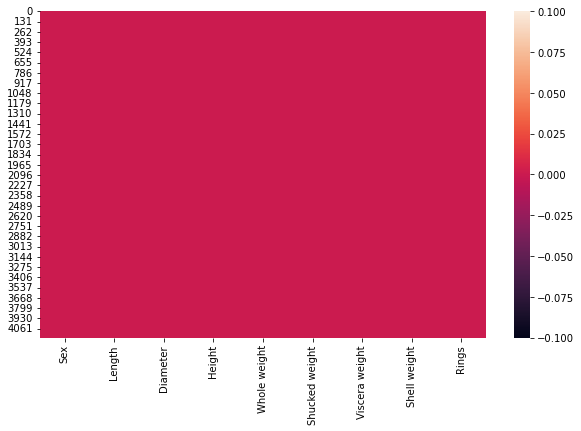

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [17]:
dfcor=df.corr()
dfcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034546
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556849
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574773
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557625
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540473
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420948
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503939
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627717
Rings,-0.034546,0.556849,0.574773,0.557625,0.540473,0.420948,0.503939,0.627717,1.000000


In [18]:
dfcor['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627717
Diameter          0.574773
Height            0.557625
Length            0.556849
Whole weight      0.540473
Viscera weight    0.503939
Shucked weight    0.420948
Sex              -0.034546
Name: Rings, dtype: float64

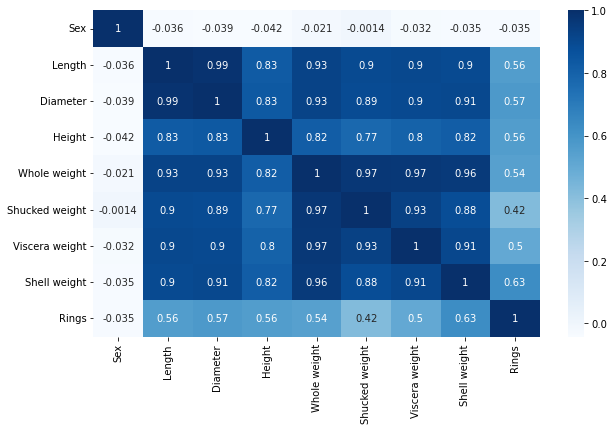

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

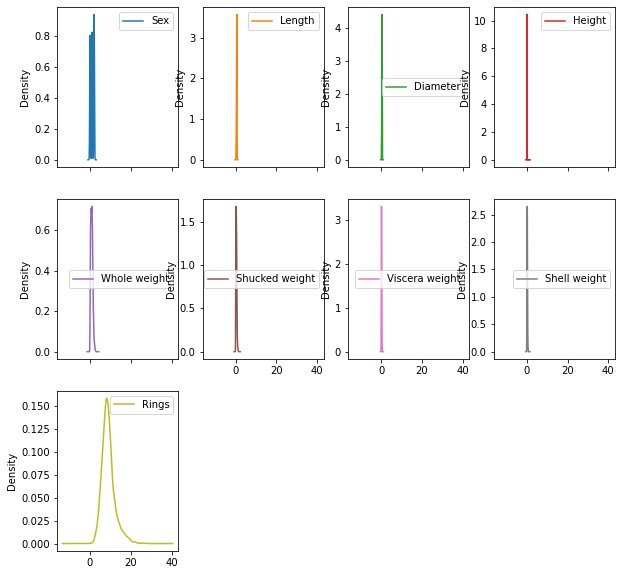

In [20]:
df.plot(kind='kde',subplots=True,layout=(3,4),figsize=(10,10))

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

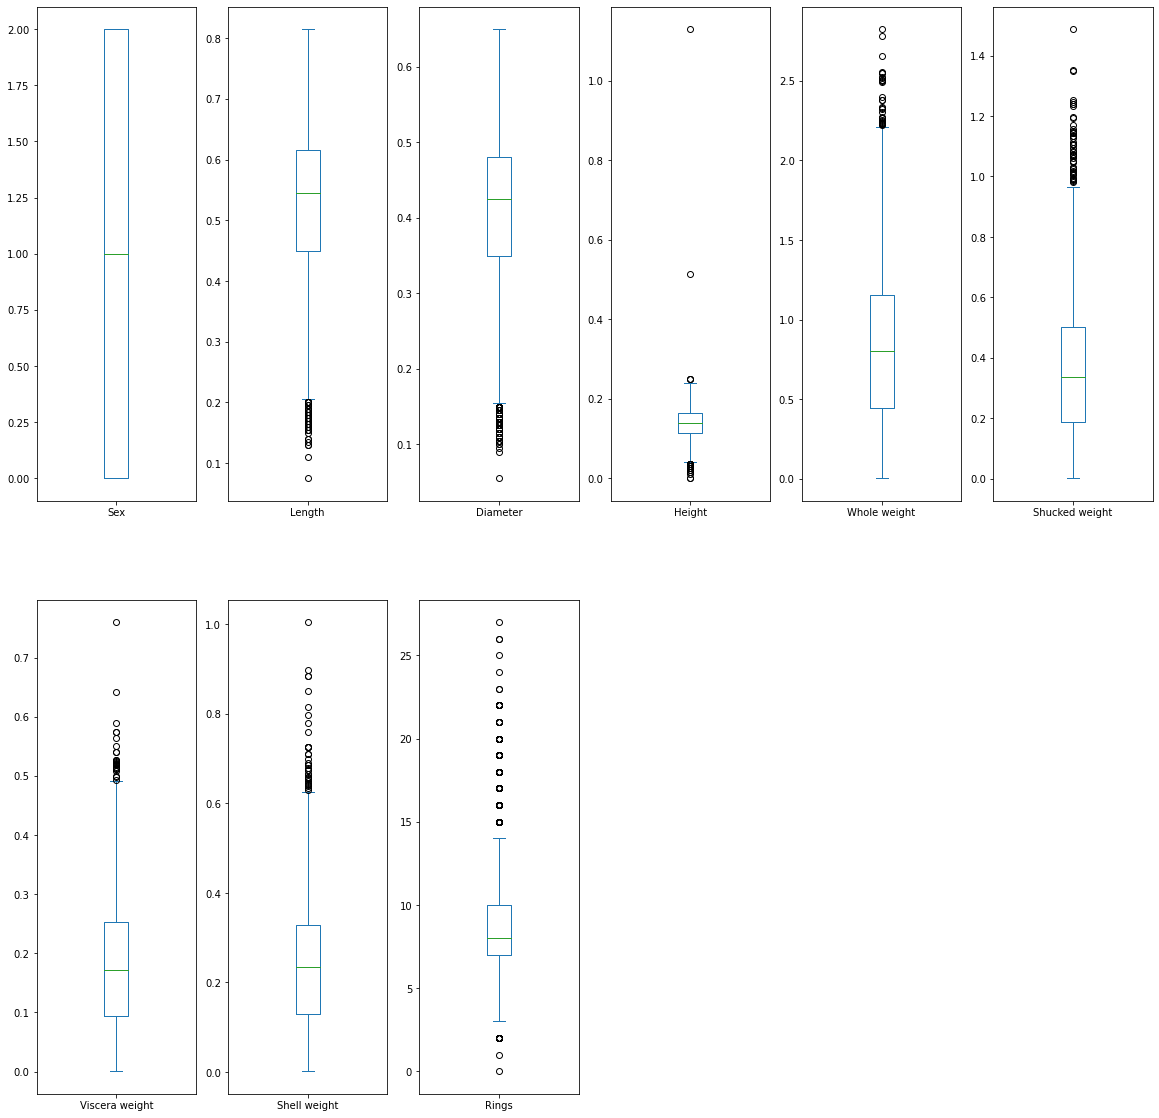

In [21]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(20,20))

In [22]:
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [23]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,14
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,6
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,8
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,6
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,10
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,9
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,8
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,9


In [24]:
df.shape

(4177, 9)

In [25]:
df_new.shape

(4027, 9)

In [26]:
df=df_new
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,14
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,6
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,8
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,6
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,10
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,9
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,8
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,9


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

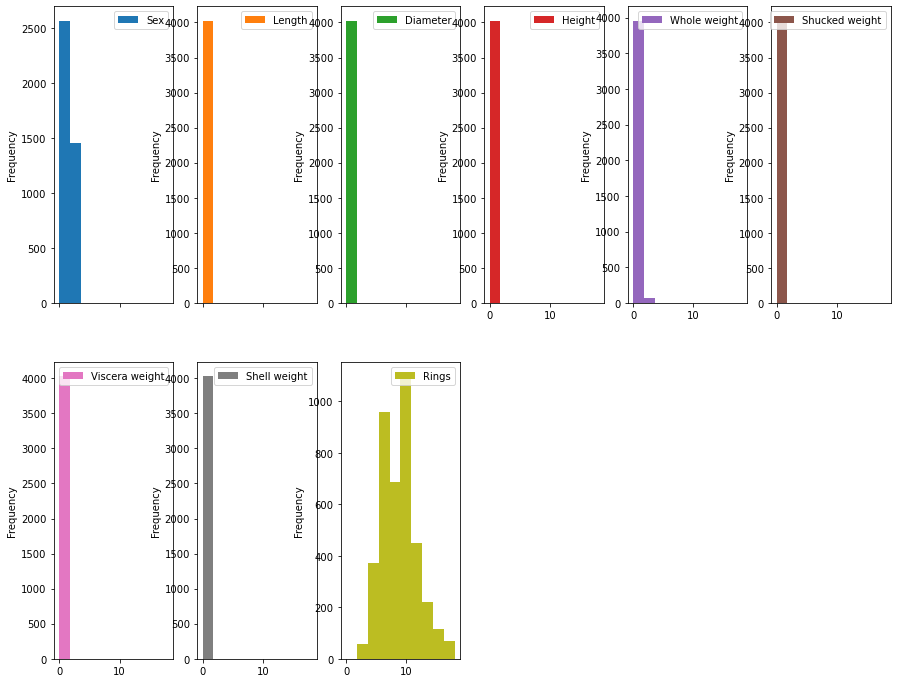

In [27]:
df.plot(kind='hist',layout=(2,6),figsize=(15,12),subplots=True)

In [28]:
x=df.iloc[:,:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [29]:
x.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [30]:
y=df.iloc[:,-1]
y

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Rings, Length: 4027, dtype: int64

In [31]:
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

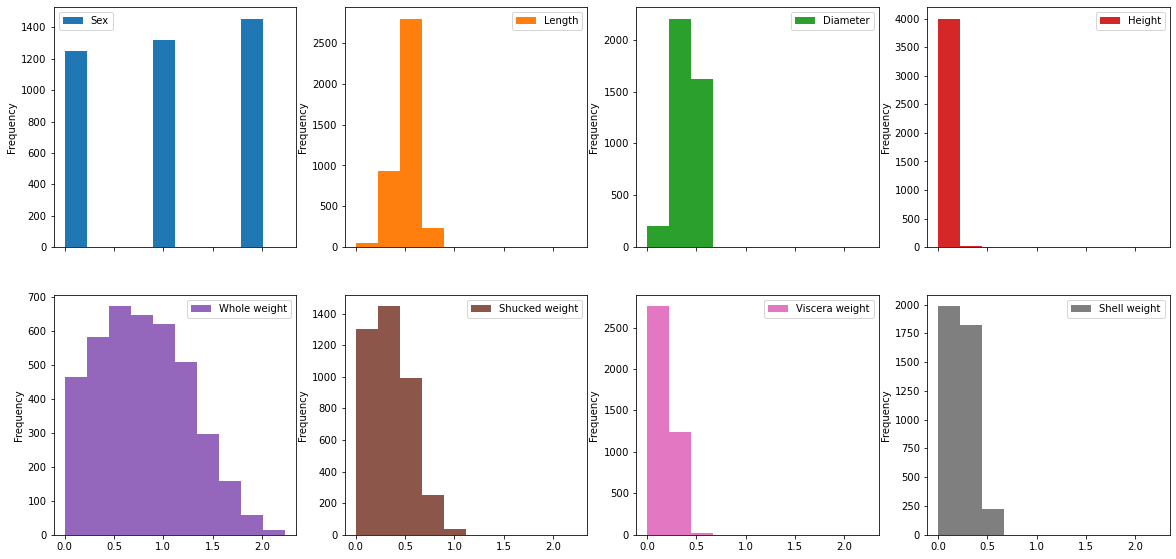

In [32]:
x.plot(kind='hist',subplots=True,figsize=(20,15),layout=(3,4))

In [33]:
from sklearn.preprocessing import power_transform

In [34]:
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.134329,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354
1,1.134329,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717
2,-1.313068,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214
3,1.134329,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533
4,-0.008746,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926
...,...,...,...,...,...,...,...,...
4022,-1.313068,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258
4023,1.134329,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936
4024,1.134329,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632
4025,-1.313068,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520


In [35]:
x.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

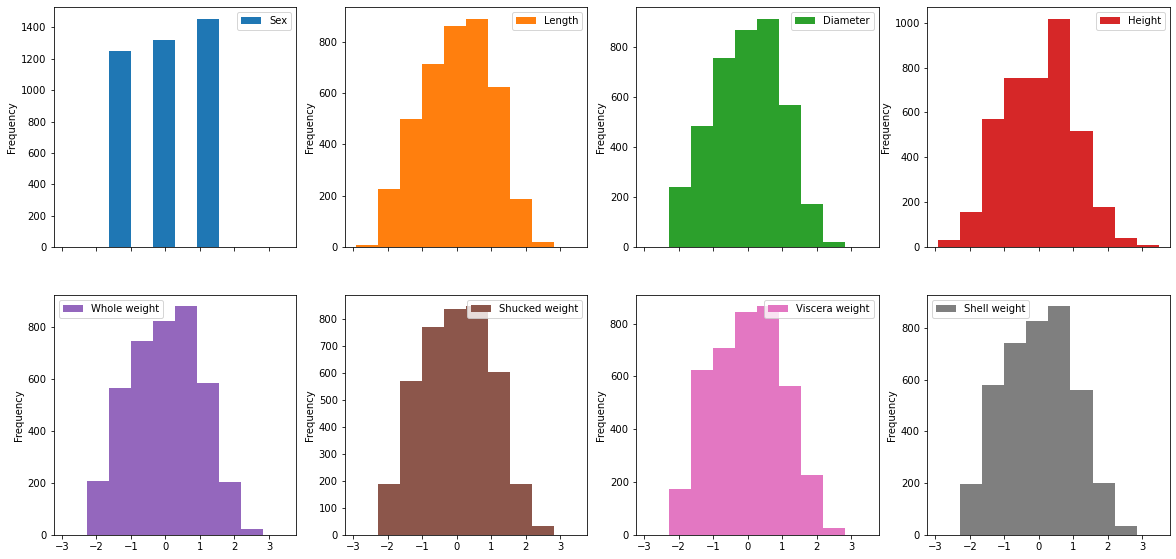

In [36]:
x.plot(kind='hist',subplots=True,figsize=(20,15),layout=(3,4))

In [37]:
y

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Rings, Length: 4027, dtype: int64

In [38]:
y.unique()

array([14,  6,  8,  9,  7, 15, 18, 13, 10, 11, 17, 12,  4,  3,  5, 16,  2],
      dtype=int64)

In [39]:
y.value_counts()

8     686
9     625
7     566
10    472
6     391
5     258
11    251
12    199
13    119
4     113
14    102
15     62
16     53
3      49
17     39
18     32
2      10
Name: Rings, dtype: int64

In [40]:
y.shape

(4027,)

In [41]:
x.shape

(4027, 8)

In [42]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [45]:
trainx.value_counts()

Sex        Length     Diameter   Height     Whole weight  Shucked weight  Viscera weight  Shell weight
-1.313068  -1.828093  -1.871027  -1.750547  -1.801837     -1.792971       -1.696742       -1.794107       1
 1.037644  -2.126954  -2.124454  -2.186901  -1.937320     -1.909119       -1.879993       -1.953063       1
 1.043357   0.309836   0.636154   1.625584   0.780678      0.290669        0.801144        0.968352       1
 1.050157  -1.244962  -1.092425  -1.280406  -1.076745     -1.049122       -1.220131       -1.103058       1
 1.055733  -2.127291  -2.124454  -2.188628  -1.937451     -1.909060       -1.880107       -1.953493       1
                                                                                                         ..
-0.008746  -2.225427  -2.190658  -2.618013  -1.966392     -1.937752       -1.931110       -1.958831       1
           -2.225362  -2.194133  -2.504425  -1.966255     -1.931531       -1.905074       -1.955824       1
           -2.225112  -2.222546  

In [46]:
trainy.value_counts()

14    686
11    686
16    686
5     686
3     686
4     686
12    686
17    686
10    686
6     686
13    686
18    686
15    686
7     686
9     686
8     686
2     686
Name: Rings, dtype: int64

In [47]:
trainy

0        14
1         6
2         8
3         9
4         6
         ..
11657    18
11658    18
11659    18
11660    18
11661    18
Name: Rings, Length: 11662, dtype: int64

In [48]:
trainx.shape

(11662, 8)

In [49]:
trainy.shape

(11662,)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=122)

In [69]:
x_train.shape

(8163, 8)

In [70]:
x_test.shape

(3499, 8)

In [71]:
y_train.shape

(8163,)

In [72]:
y_test.shape

(3499,)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('accuracy score=',accuracy_score(y_test,predkn))
print('confusion matrix=',confusion_matrix(y_test,predkn))
print('classification report=',classification_report(y_test,predkn))

accuracy score= 0.6621891969134038
confusion matrix= [[184   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8 178   3   2   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   9 172   6   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1  10  21 154  23   7   0   1   0   1   1   0   0   0   0   0   0]
 [  0   2  15  43 123  14   5   7   2   4   2   0   1   0   0   0   0]
 [  0   1   4  33  44  55  20  13  11   8   8   6   2   2   1   1   3]
 [  0   2   3   6  24  31  35  19  12  19   8   8   7   9   2   6   4]
 [  0   0   0   4   6  16  18  40  22  15  21  11  10   8   9   5   6]
 [  0   0   0   6  11  16  21  18  68  23  19  11  13   4   6   5   6]
 [  0   0   0   1   3   7  19  11  16 109  11   7   8   4   6   2   9]
 [  0   0   0   2   2   3   2   5   6   7 116   4   9   7   4   7   5]
 [  0   0   0   1   1   2   4   0   3   5  11 159   7   8   5   4   4]
 [  0   0   0   0   0   2   2   4   3   1   6   3 162   7   5   7   2]
 [  0   0   0   0   1   

In [59]:
model=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score=',accuracy_score(y_test,predm))
    print('confusion matrix=',confusion_matrix(y_test,predm))
    print('classification report=',classification_report(y_test,predm))
    

accuracy score= 0.2852243498142326
confusion matrix= [[177  43   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 66  95  36   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 18  42  91  37   7   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3  10  47  87  45   9   1   0   0   0   0   0   1   1   0   0   0]
 [  1   0  21  68  75  35   8   0   2   1   0   0   0   0   0   1   0]
 [  0   0   5  20  35  65  52   5  16   5   1   7   1   1   2   2   0]
 [  0   0   1   3  16  50  47   6  43  16   4   3   7   4   1   2   1]
 [  0   0   0  12   7  18  50   8  64  18   4  11   9   6   2   3   6]
 [  0   0   0   2   6  11  34   3  64  19   3   6   5   1   9   2   4]
 [  0   0   0   3   5  24  25   5  54  27   3  22   8  21   3   7   7]
 [  0   0   0   3  10  14  11   4  32  17   8  21  20  33  11  14  17]
 [  0   0   0   0   4   6  16   7  17  17   5  27  20  30  15  19  18]
 [  0   0   0   0   4  10  18   3  30  14   4  20  18  34  24  17  14]
 [  0   0   0   0   2   

In [75]:
print(y_test)

2534      7
6911     10
4429      2
7775     12
9819     16
         ..
11503    18
522       9
7202     11
1527      8
8772     14
Name: Rings, Length: 3499, dtype: int64


In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
score=cross_val_score(dtc,x_train,y_train,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.55358236 0.5548071  0.54623393 0.54963235 0.53063725]
0.546978600074445
0.008712424085692876


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parm={'criterion':['gini','entropy']}
gcv=GridSearchCV(DecisionTreeClassifier(),parm,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.589882823663904